In [1]:
import matplotlib.pyplot as plt
import numpy as np
import io_utils

In [2]:
DIRS = ['debussy', 'mozart', 'beeth', 'chopin', 'grieg', 'mendelssohn', 'borodin', 'bach']

In [3]:
BUCKETS = [(1.0/16, 'd'), (1.0/16, 't'), (1.0/16,),
            (1.0/8, 'd'), (1.0/8, 't'), (1.0/8,),
            (1.0/4, 'd'), (1.0/4, 't'), (1.0/4,),
            (1.0/2, 'd'), (1.0/2,),
            (1.0,)]

In [4]:
TEMPO_ERRORS = [i for i in range(-90, 121, 2)]

In [5]:
def averageErrors(H_mat, E_mat_with_error):
    num_songs = len(E_mat_with_error)
    num_tempos = len(E_mat_with_error[0])
    print num_songs
    print num_tempos
    errors = np.zeros(num_tempos)
    for tempo_index in range(num_tempos):
        error_percent_sum = 0
        for song_index in range(num_songs):
            diffs = 0
            total = 0
            for event_index in range(len(H_mat[song_index])):
                H_event = H_mat[song_index][event_index]
                E_event = E_mat_with_error[song_index][tempo_index][event_index]
                #if H_event[0] == None: print 'None bucket'
                if H_event[0] != None:
                    if H_event != E_event:
                        diffs += 1
#                     else:
#                         print 'Match'
#                         print H_mat[song_index][event_index], E_mat_with_error[song_index][tempo_index][event_index]
                    total += 1
            if total == 0:
                song_error = 0
#                 print 'empty song'
            else:
                song_error = float(diffs) / total * 100
                error_percent_sum += song_error
        #print 'Error percent sum:', error_percent_sum
        average_song_error = error_percent_sum / num_songs
        errors[tempo_index] = average_song_error
    return errors  

In [6]:
def plotTempoErrors(tempo_errors, metric, metric_name):
    # Returns plot
    H_mat, E_mat_with_error, tempo_list, filenames, sigs = \
        io_utils.generateTempoErrorData(DIRS, BUCKETS, TEMPO_ERRORS)
    errors = averageErrors(H_mat, E_mat_with_error)
    tempo_diffs = np.array(TEMPO_ERRORS)
    print 'Tempo Error: ', tempo_diffs
    print 'Song Errors: ', errors
    plt.plot(tempo_diffs, errors)
    plt.title('Song Error by Tempo Percent Error from Median')
    plt.xlabel('Tempo Percent Error')
    plt.ylabel('Average song error (' + metric_name + ')')
    

- Non-errors on tempos slowed way down are all 16th note triplets
- bucketing on notes that are way faster than this (trills/rolls/grace notes) will still be in this bucket
- Seeing more 16th triplets than expect (especially 16th triplet rests), maybe accidentally inserting for places note is lifted but not rest?
*Added test to ignore tiny tick differences rather than bucketing as 16th triplet*

148
106
Tempo Error:  [-90 -88 -86 -84 -82 -80 -78 -76 -74 -72 -70 -68 -66 -64 -62 -60 -58 -56
 -54 -52 -50 -48 -46 -44 -42 -40 -38 -36 -34 -32 -30 -28 -26 -24 -22 -20
 -18 -16 -14 -12 -10  -8  -6  -4  -2   0   2   4   6   8  10  12  14  16
  18  20  22  24  26  28  30  32  34  36  38  40  42  44  46  48  50  52
  54  56  58  60  62  64  66  68  70  72  74  76  78  80  82  84  86  88
  90  92  94  96  98 100 102 104 106 108 110 112 114 116 118 120]
Song Errors:  [ 89.86223174  89.86285498  89.86139058  89.85553933  89.85376785
  89.84538289  89.81329125  89.7323187   89.65446053  89.59716491
  89.51902605  89.52997829  89.60369706  89.68908504  89.72322454
  89.71273795  89.68501419  89.62231973  89.56970898  89.5197565
  89.40713878  89.32747231  89.25892669  89.1523738   88.98571011
  88.58720224  88.01341062  87.39663709  86.94094417  86.38507441
  85.6255429   84.85049385  83.69112323  81.93126156  79.67609709
  76.54087347  71.58578771  62.88625202  51.09875827  40.52745752
  30.4

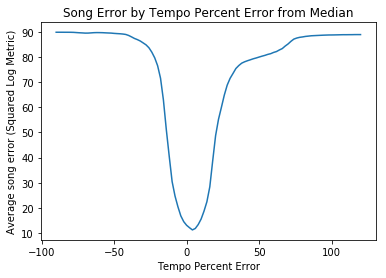

148
106
Tempo Error:  [-90 -88 -86 -84 -82 -80 -78 -76 -74 -72 -70 -68 -66 -64 -62 -60 -58 -56
 -54 -52 -50 -48 -46 -44 -42 -40 -38 -36 -34 -32 -30 -28 -26 -24 -22 -20
 -18 -16 -14 -12 -10  -8  -6  -4  -2   0   2   4   6   8  10  12  14  16
  18  20  22  24  26  28  30  32  34  36  38  40  42  44  46  48  50  52
  54  56  58  60  62  64  66  68  70  72  74  76  78  80  82  84  86  88
  90  92  94  96  98 100 102 104 106 108 110 112 114 116 118 120]
Song Errors:  [ 89.86223174  89.86285498  89.86139058  89.85553933  89.85376785
  89.84538289  89.81329125  89.7323187   89.65446053  89.59716491
  89.51902605  89.52997829  89.60369706  89.68908504  89.72322454
  89.71273795  89.68501419  89.62231973  89.56970898  89.5197565
  89.40713878  89.32747231  89.25892669  89.1523738   88.98571011
  88.58720224  88.01341062  87.39663709  86.94094417  86.38507441
  85.6255429   84.85049385  83.69112323  81.93126156  79.67609709
  76.54087347  71.58578771  62.88625202  51.09875827  40.52745752
  30.4

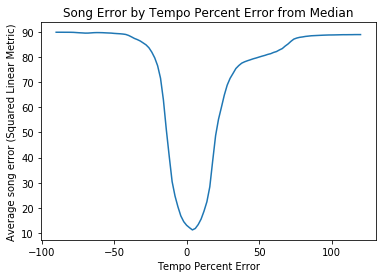

In [7]:
plotTempoErrors(TEMPO_ERRORS, io_utils.squaredLogMetric, 'Squared Log Metric')
plt.show()
plotTempoErrors(TEMPO_ERRORS, io_utils.squaredLogMetric, 'Squared Linear Metric')
plt.show()